In [9]:
import os
import json 
import pandas as pd
import numpy as np

In [10]:
# Load the data from json 
file_path = os.path.join(os.getcwd(),'ThinkAI_Repo', 'card_details.json')  # for local testing
#file_path = '/teamspace/studios/this_studio/ThinkAI_Repo/card_details.json'
with open(file_path, 'r') as f:
    data = json.load(f)

# Load scrapped data from Ideenplattform 

In [11]:
# Convert the data to a pandas dataframe
raw_data_df = pd.DataFrame(data)

In [12]:
raw_data_df

,title,description,status,tag,vote
0,Verkehrsberuhigter Bereich Holwedestraße,In der Holwedestraße ist der Verkehr viel zu s...,Umgesetzt,Verkehr,12 von 50
1,Sicherer Schulweg Querum,Eichhahnweg bis Wabenkamp Einbahnstrasse .Nur ...,Abgelehnt,Verkehr,0 von 50
2,Wickelboard auf städtischen Spielplätzen,"Liebe MitarbeiterInnen der Stadt Braunschweig,...",Die Idee wird den politischen Gremien zur Ents...,Stadtgrün und Umwelt,50 von 50
3,Neugestaltung WOLLMARKT,Der Starkregen 2023 hat mal wieder verdeutlich...,Zeitraum für Stimmabgabe überschritten,Stadtgrün und Umwelt,19 von 50
4,Dauerhafte Begrünung des Schlossplatzes und Pl...,Der Schlossplatz und der Platz der Deutschen E...,Zeitraum für Stimmabgabe überschritten,Stadtgrün und Umwelt,27 von 50
...,...,...,...,...,...
125,Optimierung Fußgängerampel Ackerstr./Helmstedt...,Die Fußgängerampel Ackerstr./Helmstedter Str. ...,Zeitraum für Stimmabgabe überschritten,Verkehr,11 von 50
126,Abstimmungen im Protokoll mit Angabe des genau...,In den Protokollen der Stadträte wird bei Abst...,Abgelehnt,Allgemeine Verwaltung,14 von 50
127,Wilhelm-Bornstedt-Weg entlang der Oker besser ...,Der Weg wird zwischen altem Okerarm und Brücke...,Zeitraum für Stimmabgabe überschritten,Verkehr,7 von 50
128,Hundewiese Nußberg,Es fehlen Sitzbänke entlang des Trimm-Dich-Pfa...,Zeitraum für Stimmabgabe überschritten,Stadtgrün und Umwelt,8 von 50


In [13]:
tags = raw_data_df["tag"].tolist()

In [14]:
# 2. Define sentences to encode 
sentences = raw_data_df['description'].tolist()
titles = raw_data_df['title'].tolist()

## Visualize  the data 
TODO

# SBERT with Transformer model 

In [7]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")
model

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [8]:
# 3. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)

In [9]:
embeddings.shape

(130, 384)

## UMAP 

In [21]:
from umap import UMAP

# Initialize UMAP model
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric="cosine")

In [22]:
# Fit and transform the embeddings
umap_embeddings = umap_model.fit_transform(embeddings)

In [23]:
titles = raw_data_df["title"].tolist()

In [24]:
titles

['Verkehrsberuhigter Bereich Holwedestraße',
 'Sicherer Schulweg Querum',
 'Wickelboard auf städtischen Spielplätzen',
 'Neugestaltung WOLLMARKT',
 'Dauerhafte Begrünung des Schlossplatzes und Platz der Deutschen Einheit',
 'Mehr Mülleimer im Waldstück zwischen Kralenriede, der Schuntersiedlung und Rühme.',
 'Beleuchtung Wasserturm Giersberg',
 'Tempo 30 Madamenweg/Ringgleis bis Kreuzung Madamenweg/Altstadring',
 'Zeitgemäße Funktionalität für die Ideenplattform',
 'Spielplätze im Herbst/Winter nutzbarer machen',
 'Fahrradkonzept Wendenstraße überarbeiten...',
 'Brodweg - brisant für alle Verkehrsteilnehmenden',
 'Schulverkehr Querum',
 'Solarunterstand für Räder',
 'Kastanienallee Ampelschaltung anpassen',
 'Verkehrspiegel Ausfahrt Buschweg auf die Hauptstraße in Wenden',
 'Ampel für Radfahrer Wendenring Ecke Maschpl',
 'Hundewiese am Jütenring einrichten - Bebauungsplan HA 137 ändern',
 'Unterstützung für besonders gefährdete Menschen bei Hitze',
 'Geschwindigkeits- und Durchfahrtsbe

In [25]:
# Create a dataframe for visualization
import plotly.express as px
import pandas as pd

# Create a new column for hover data with truncated text
umap_embeddings_df = pd.DataFrame(umap_embeddings, columns=["x", "y"])
umap_embeddings_df["hover_text"] = titles
umap_embeddings_df["label"] = tags

# Plotting using Plotly
fig = px.scatter(umap_embeddings_df, x="x", y="y", color="label", hover_data=["hover_text"])
fig.show()

In [15]:
# Initialize UMAP model with n_components=3 for dimensionality reduction to 3 dimensions
umap_model = UMAP(n_neighbors=10, n_components=3, min_dist=0.0, metric="cosine")

# Fit and transform the embeddings
umap_embeddings = umap_model.fit_transform(embeddings)

In [16]:
# Create a dataframe for visualization
import plotly.express as px
import pandas as pd

# Create a new column for hover data with truncated text
umap_embeddings_df = pd.DataFrame(umap_embeddings, columns=["x", "y", "z"])
umap_embeddings_df["hover_text"] = titles
umap_embeddings_df["label"] = tags

# Plotting using scatter_3d instead of scatter with extra "z" argument
fig = px.scatter_3d(umap_embeddings_df, x="x", y="y", z="z", color="label", hover_data=["hover_text"])
fig.show()

## Topic Modeling with BERTopic 

ref : https://www.kaggle.com/code/johannareiml/intuitions-about-bertopic#Installing-BERTopic

tune BERTopic : https://maartengr.github.io/BERTopic/getting_started/parameter%20tuning/parametertuning.html

In [26]:
from nltk.corpus import stopwords
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
!pip install stop-words

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import nltk
nltk.download('stopwords')

In [28]:
from bertopic.backend import languages
print(languages)

['arabic', 'bulgarian', 'catalan', 'czech', 'danish', 'german', 'greek', 'english', 'spanish', 'estonian', 'persian', 'finnish', 'french', 'canadian french', 'galician', 'gujarati', 'hebrew', 'hindi', 'croatian', 'hungarian', 'armenian', 'indonesian', 'italian', 'japanese', 'georgian', 'korean', 'kurdish', 'lithuanian', 'latvian', 'macedonian', 'mongolian', 'marathi', 'malay', 'burmese', 'norwegian bokmal', 'dutch', 'polish', 'portuguese', 'brazilian portuguese', 'romanian', 'russian', 'slovak', 'slovenian', 'albanian', 'serbian', 'swedish', 'thai', 'turkish', 'ukrainian', 'urdu', 'vietnamese', 'chinese (simplified)', 'chinese (traditional)']


In [29]:
from stop_words import get_stop_words

stop_words = get_stop_words('de')

In [30]:
# count vectorizer is for turning documents into words. stop words refer to common tokens like "the" or "a"

german_stop_words = stopwords.words('german')
from stop_words import get_stop_words

stop_words = get_stop_words('de')

vectorizer_model = CountVectorizer(stop_words = stop_words)
topic_model = BERTopic(vectorizer_model=vectorizer_model,
                       language="german",
                       top_n_words= 20,
                       n_gram_range= (1, 1),
                       min_topic_size= 2,
                       nr_topics= None,
                       verbose=True)

In [31]:
topic_model.fit(sentences)

2024-08-07 15:42:00,297 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2024-08-07 15:42:06,854 - BERTopic - Embedding - Completed ✓
2024-08-07 15:42:06,854 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-07 15:42:08,256 - BERTopic - Dimensionality - Completed ✓
2024-08-07 15:42:08,259 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-07 15:42:08,279 - BERTopic - Cluster - Completed ✓
2024-08-07 15:42:08,284 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-07 15:42:08,320 - BERTopic - Representation - Completed ✓


In [32]:
topics_df = topic_model.get_topic_info()
topics_df

,Topic,Count,Name,Representation,Representative_Docs
0,-1,24,-1_mütter_stadt_arbeiten_kind,"[mütter, stadt, arbeiten, kind, sodass, fahren...",[Bei einem Universitäts-Campus sollte es sich ...
1,0,12,0_parkplätze_linien_mehr_parkflächen,"[parkplätze, linien, mehr, parkflächen, stadt,...",[In der Braunschweiger Zeitung bzw. deren Onli...
2,1,11,1_radweg_radfahrer_richtung_wendenstraße,"[radweg, radfahrer, richtung, wendenstraße, re...",[Der Handelsweg ist eine der beliebtesten Stra...
3,2,7,2_radfahrer_fußgänger_ringgleis_fahrbahn,"[radfahrer, fußgänger, ringgleis, fahrbahn, st...","[Sehr geehrte Damen und Herren,an der vorgenan..."
4,3,7,3_hunde_hundewiese_fläche_hundebesitzer,"[hunde, hundewiese, fläche, hundebesitzer, pum...",[Die bisherigen und zukünftigen Anwohner am ge...
5,4,7,4_menschen_grünflächen_hitze_hitzetage,"[menschen, grünflächen, hitze, hitzetage, bode...","[Unsere Böden verarmen, die Artenvielfalt nimm..."
6,5,7,5_skatepark_spielplatz_wasserspielplatz_spielen,"[skatepark, spielplatz, wasserspielplatz, spie...",[Broitzem hat einige schöne Spielplätze. Aller...
7,6,6,6_braunschweig_tarent_leisewitz_johann,"[braunschweig, tarent, leisewitz, johann, proj...",[Liebe MitarbeiterInnen der Stadt Braunschweig...
8,7,5,7_lärm_ingbert_gegenstimmen_konzerte,"[lärm, ingbert, gegenstimmen, konzerte, st, ge...",[In den Protokollen der Stadträte wird bei Abs...
9,8,5,8_burg_läden_burgplatz_gasse,"[burg, läden, burgplatz, gasse, plätze, handel...",[Die Burgpassage zu einem dauerhaften Markt um...


In [33]:
topic_model.topics_

[13,
 1,
 6,
 4,
 8,
 3,
 -1,
 15,
 6,
 5,
 1,
 -1,
 9,
 4,
 15,
 1,
 -1,
 3,
 4,
 17,
 -1,
 6,
 -1,
 8,
 11,
 16,
 11,
 7,
 12,
 -1,
 8,
 11,
 11,
 -1,
 13,
 5,
 2,
 2,
 0,
 0,
 10,
 -1,
 -1,
 0,
 12,
 3,
 3,
 1,
 2,
 8,
 -1,
 9,
 0,
 18,
 4,
 5,
 2,
 19,
 18,
 7,
 -1,
 10,
 9,
 0,
 20,
 -1,
 0,
 6,
 0,
 4,
 5,
 15,
 6,
 4,
 -1,
 1,
 8,
 10,
 -1,
 -1,
 0,
 5,
 6,
 17,
 10,
 2,
 1,
 14,
 16,
 14,
 -1,
 1,
 12,
 9,
 -1,
 -1,
 5,
 7,
 19,
 -1,
 -1,
 5,
 0,
 1,
 0,
 0,
 1,
 3,
 1,
 11,
 7,
 -1,
 -1,
 -1,
 -1,
 3,
 20,
 4,
 0,
 13,
 10,
 2,
 12,
 9,
 1,
 16,
 7,
 2,
 3,
 14]

In [34]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

n_examples = 10
example_docs = sentences[:n_examples]
example_tags = tags[:n_examples]
example_docs_topic_id = topic_model.topics_[:n_examples]

for doc, label, topic_id in zip(example_docs,example_tags, example_docs_topic_id):
    topic = topic_model.topic_labels_[topic_id]
    print("-----------------------")
    print(topic)
    print(f"tages : {label}")

    print("\n")
    pp.pprint(doc)
    print("-----------------------")

-----------------------
13_vorm_vorallem_schloss_rathaus
tages : Verkehr


('In der Holwedestraße ist der Verkehr viel zu schnell, extreme Raser vorallem '
 'Abends, aber auch tagsüber. Dadurch besteht eine große Gefahr für Kinder '
 'vorallem auch im Bereich der Kita oder aber auch Passanten im Bereich des '
 'Klinikums. Es gibt schon eine Geschwindigkeitsbegrenzung, die aber absolut '
 'ignoriert wird.')
-----------------------
-----------------------
1_radweg_radfahrer_richtung_wendenstraße
tages : Verkehr


('Eichhahnweg bis Wabenkamp Einbahnstrasse .Nur einfahrt in den Eichhahnweg '
 'von der Bevenroderstrasse.Somit währe die gesamte Situation '
 'Eichhahnweg/Bevenroderstrasse entschärft.')
-----------------------
-----------------------
6_braunschweig_tarent_leisewitz_johann
tages : Stadtgrün und Umwelt


('Liebe MitarbeiterInnen der Stadt Braunschweig,bei unserem letzten Urlaub in '
 'Freiburg haben wir in einem Tierpark auf einem Spielplatz einen fest '
 'installierten Outdoor-

In [35]:
topic_model.visualize_topics()

In [36]:
topic_model.visualize_hierarchy()

In [37]:
topic_model.visualize_barchart(top_n_topics=20)

## Topic Modeling with Llama2

ref : https://colab.research.google.com/drive/1QCERSMUjqGetGGujdrvv_6_EeoIcd_9M?usp=sharing
https://github.com/MaartenGr/BERTopic/tree/master


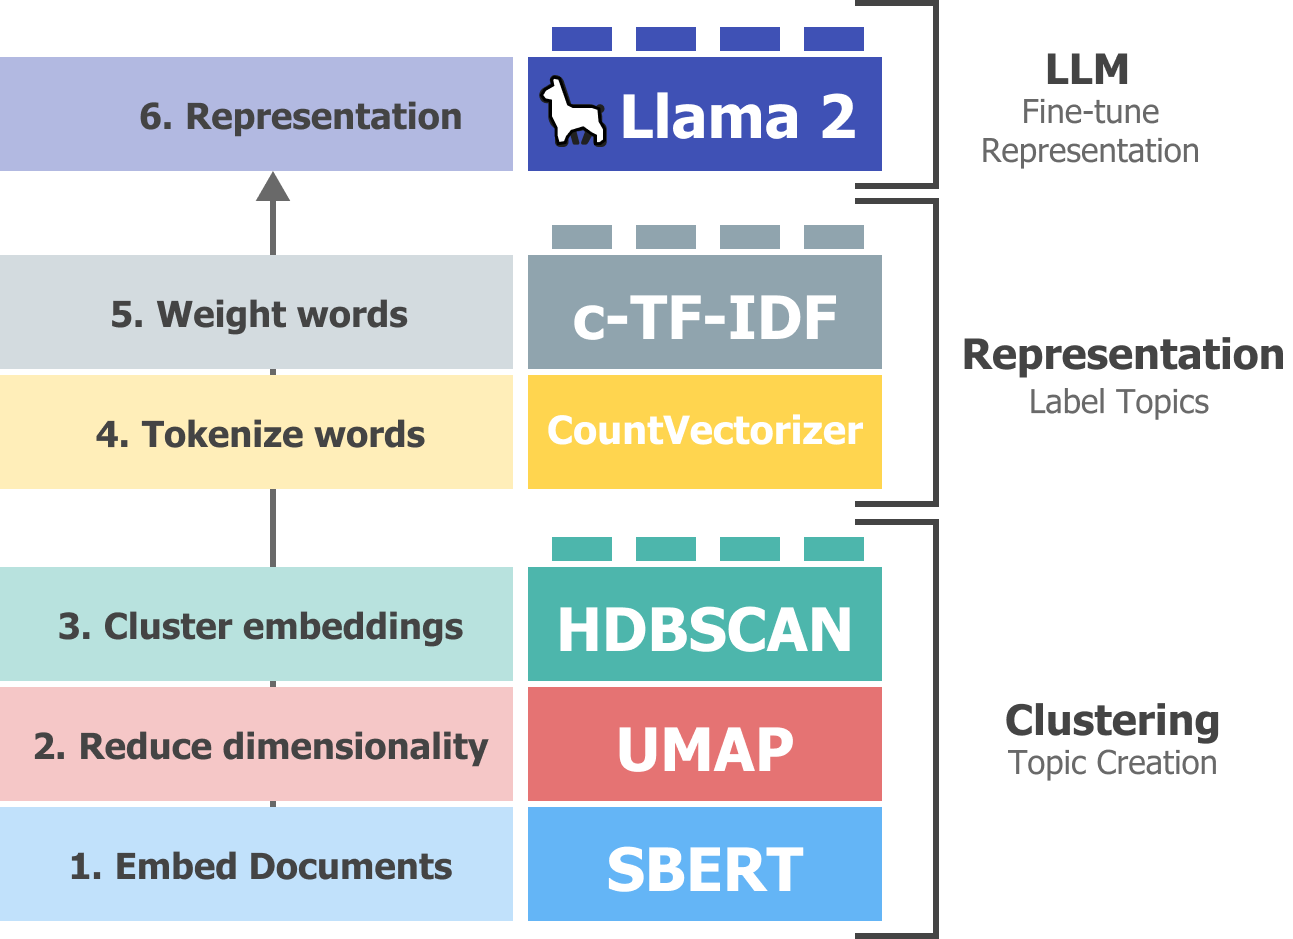

In [ ]:
%%capture
!pip install accelerate bitsandbytes xformers adjustText

In [4]:
from huggingface_hub import notebook_login
notebook_login()

In [1]:
# Llama 2
from torch import cuda

model_id = 'meta-llama/Llama-2-7b-chat-hf'
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

print(device)

cuda:0


### Optimization and Quantization

In order to load our 13 billion parameter model, we will need to perform some optimization tricks. Since we have limited VRAM and not an A100 GPU, we will need to "condense" the model a bit so that we can run it.

There are a number of tricks that we can use but the main principle is going to be 4-bit quantization.

This process reduces the 64-bit representation to only 4-bits which reduces the GPU memory that we will need. It is a recent technique and quite an elegant at that for efficient LLM loading and usage. You can find more about that method here in the QLoRA paper and on the amazing HuggingFace blog here.

In [5]:
from torch import bfloat16
import transformers

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,  # 4-bit quantization
    bnb_4bit_quant_type='nf4',  # Normalized float 4
    bnb_4bit_use_double_quant=True,  # Second quantization after the first
    bnb_4bit_compute_dtype=bfloat16  # Computation type
)

In [6]:
# Llama 2 Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Llama 2 Model
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)
model.eval()

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear4bit(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=

In [7]:
import torch
import torchvision

print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

Torch version: 2.4.0+cu121
Torchvision version: 0.19.0+cu121


### Llama 2 for BERTopic
Before we can start with topic modeling, we will first need to perform two steps:

* Pre-calculating Embeddings

* Defining Sub-models

In [8]:
from sentence_transformers import SentenceTransformer

# 1. Pre-calculate embeddings
embedding_model = SentenceTransformer('aari1995/German_Semantic_STS_V2')
embeddings = embedding_model.encode(sentences, show_progress_bar=True)

No sentence-transformers model found with name aari1995/German_Semantic_STS_V2. Creating a new one with mean pooling.


config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/729k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


NameError: name 'sentences' is not defined

In [51]:
# 2. Sub-models (UMAP and HDBSCAN)
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=5, n_components=5, min_dist=0.0, metric='cosine', random_state=42) # Tune
hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True) # Tune

In [36]:
# Using the model and tokenizer, we will generate a HuggingFace transformers pipeline that allows us to easily generate new text:

# Llama 2 Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Llama 2 Model
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)

# Text Generation Pipeline

generator = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    temperature=0.1,
    max_new_tokens=500,
    repetition_penalty=1.1
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### Prompt Template 

This template consists of two main components, namely the {{ System Prompt }} and the {{ User Prompt }}:

* The {{ System Prompt }} helps us guide the model during a conversation. For example, we can say that it is a helpful assisant that is specialized in labeling topics.
* The {{ User Prompt }} is where we ask it a question.

You might have noticed the [INST] tags, these are used to identify the beginning and end of a prompt. We can use these to model the conversation history as we will see more in-depth later on.

Next, let's see how we can use this template to optimize Llama 2 for topic modeling.


There are two BERTopic-specific tags that are of interest, namely [DOCUMENTS] and [KEYWORDS]:

* [DOCUMENTS] contain the top 5 most relevant documents to the topic
* [KEYWORDS] contain the top 10 most relevant keywords to the topic as generated through c-TF-IDF

This template will be filled accordingly to each topic. And finally, we can combine this into our final prompt:

In [37]:
# PRompt for the generator
# System prompt describes information given to all conversations
system_prompt = """
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant for labeling topics in german language.
<</SYS>>
"""

# Example prompt demonstrating the output we are looking for
example_prompt = """
I have a topic that contains the following documents:
- Traditional diets in most cultures were primarily plant-based with a little meat on top, but with the rise of industrial style meat production and factory farming, meat has become a staple food.
- Meat, but especially beef, is the word food in terms of emissions.
- Eating meat doesn't make you a bad person, not eating meat doesn't make you a good one.

The topic is described by the following keywords: 'meat, beef, eat, eating, emissions, steak, food, health, processed, chicken'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.

[/INST] Environmental impacts of eating meat
"""

# Our main prompt with documents ([DOCUMENTS]) and keywords ([KEYWORDS]) tags
main_prompt = """
[INST]
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.
[/INST]
"""



prompt = system_prompt + example_prompt + main_prompt

In [38]:
# 3. Representation Models using c-TF-IDF

from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration

# KeyBERT
keybert = KeyBERTInspired()

# MMR
mmr = MaximalMarginalRelevance(diversity=0.3)

# Text generation with Llama 2
llama2 = TextGeneration(generator, prompt=prompt)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    "Llama2": llama2,
    "MMR": mmr,
}

#### Training 

Now that we have our models prepared, we can start training our topic model! We supply BERTopic with the sub-models of interest, run .fit_transform, and see what kind of topics we get.

In [39]:
embeddings.shape

(130, 1024)

In [52]:
# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

In [53]:
representation_model

{'KeyBERT': KeyBERTInspired(),
 'Llama2': TextGeneration(model=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7f3ace7f7040>,
                prompt='\n'
                       '<s>[INST] <<SYS>>\n'
                       'You are a helpful, respectful and honest assistant for '
                       'labeling topics in german language.\n'
                       '<</SYS>>\n'
                       '\n'
                       'I have a topic that contains the following documents:\n'
                       '- Traditional diets in most cultures were primarily '
                       'plant-based with a l...
                       'only return the label and nothing more.\n'
                       '\n'
                       '[/INST] Environmental impacts of eating meat\n'
                       '\n'
                       '[INST]\n'
                       'I have a topic that contains the following documents:\n'
                       '[DOCUMENTS]\n'
          

In [54]:
embedding_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [85]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  language="german",
  top_n_words= 20,
  n_gram_range= (1, 1),
  min_topic_size= 2,
  nr_topics= None,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(sentences, embeddings)

2024-08-07 12:58:49,154 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-07 12:58:50,109 - BERTopic - Dimensionality - Completed ✓
2024-08-07 12:58:50,110 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-07 12:58:50,116 - BERTopic - Cluster - Completed ✓
2024-08-07 12:58:50,119 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 3/3 [00:28<00:00,  9.48s/it]
2024-08-07 12:59:19,835 - BERTopic - Representation - Completed ✓


In [86]:
probs.shape

(130,)

In [87]:
# Show topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Llama2,MMR,Representative_Docs
0,-1,85,-1_die_und_der_in,"[die, und, der, in, zu, eine, ist, für, den, e...","[diese, die, sie, den, bereich, eine, bereits,...","[Family-Friendly Workplace, , , , , , , , , ]","[und, der, es, nicht, im, oder, sich, dass, si...","[Leider sind viele Frauen, die arbeiten, oft b..."
1,0,26,0_der_die_und_zu,"[der, die, und, zu, auf, ist, von, radfahrer, ...","[radweg, fahrradfahrer, radfahrende, radfahrer...","[Traffic safety improvements in Braunschweig, ...","[der, zu, radfahrer, straße, nicht, radweg, da...",[Der Handelsweg ist eine der beliebtesten Stra...
2,1,19,1_die_und_der_für,"[die, und, der, für, in, zu, es, mit, braunsch...","[parkplätze, läden, parksituation, den, brauns...","[""Braunschweig's Parking Crisis: Residents Dem...","[und, braunschweig, ist, im, stadt, nicht, den...",[Im Zuge der kontrovers diskutierten Grünfläch...


In [88]:
topic_model.get_topic(1, full=True)["KeyBERT"]

[('parkplätze', 0.71909046),
 ('läden', 0.71827614),
 ('parksituation', 0.70290184),
 ('den', 0.69787866),
 ('braunschweig', 0.6968157),
 ('braunschweiger', 0.6961447),
 ('projekt', 0.6959363),
 ('die', 0.6913995),
 ('volmestraße', 0.68369013),
 ('einzelhandel', 0.6821361)]

In [89]:
llama2_labels = [label[0][0].split("\n")[0] for label in topic_model.get_topics(full=True)["Llama2"].values()]
topic_model.set_topic_labels(llama2_labels)

In [90]:
llama2_labels

['Family-Friendly Workplace',
 'Traffic safety improvements in Braunschweig',
 '"Braunschweig\'s Parking Crisis: Residents Demand Solutions"']

In [92]:
topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings, hide_annotations=True, hide_document_hover=True, custom_labels=True)

In [80]:
import itertools
import pandas as pd

# Define colors for the visualization to iterate over
colors = itertools.cycle(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
color_key = {str(topic): next(colors) for topic in set(topic_model.topics_) if topic != -1}

# Prepare dataframe and ignore outliers
df = pd.DataFrame({"x": reduced_embeddings[:, 0], "y": reduced_embeddings[:, 1], "Topic": [str(t) for t in topic_model.topics_]})
df["Length"] = [len(doc) for doc in sentences]
df = df.loc[df.Topic != "-1"]
df = df.loc[(df.y > -10) & (df.y < 10) & (df.x < 10) & (df.x > -10), :]
df["Topic"] = df["Topic"].astype("category")

# Get centroids of clusters
mean_df = df.groupby("Topic").mean().reset_index()
mean_df.Topic = mean_df.Topic.astype(int)
mean_df = mean_df.sort_values("Topic")

In [82]:
!pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


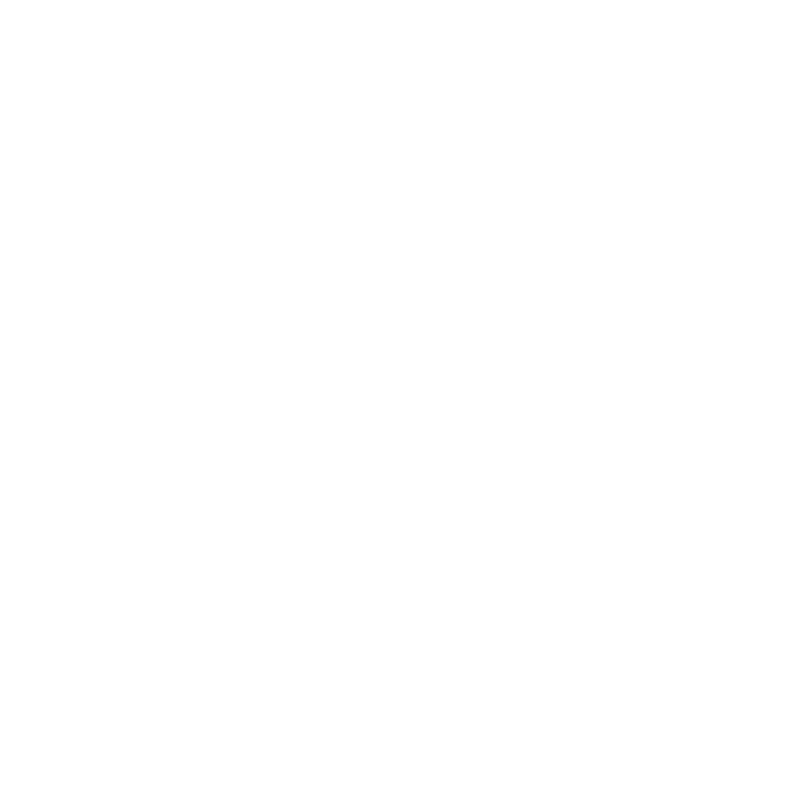

In [83]:
import seaborn as sns
from matplotlib import pyplot as plt
from adjustText import adjust_text
import matplotlib.patheffects as pe
import textwrap

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='x', y='y', c=df['Topic'].map(color_key), alpha=0.4, sizes=(0.4, 10), size="Length")

# Annotate top 50 topics
texts, xs, ys = [], [], []
for row in mean_df.iterrows():
  topic = row[1]["Topic"]
  name = textwrap.fill(topic_model.custom_labels_[int(topic)], 20)

  if int(topic) <= 50:
    xs.append(row[1]["x"])
    ys.append(row[1]["y"])
    texts.append(plt.text(row[1]["x"], row[1]["y"], name, size=10, ha="center", color=color_key[str(int(topic))],
                          path_effects=[pe.withStroke(linewidth=0.5, foreground="black")]
                          ))

# Adjust annotations such that they do not overlap
adjust_text(texts, x=xs, y=ys, time_lim=1, force_text=(0.01, 0.02), force_static=(0.01, 0.02), force_pull=(0.5, 0.5))
plt.axis('off')
plt.legend('', frameon=False)
plt.show()